```
Name : Rutu Ketankumar Shah
Course Title : Advanced Big Data and Data Mining
Lab Title : Lab 6: Association Rule Mining with Apriori and FP-Growth
```


In [ ]:
import pandas as pd

#to use the csv file from my computer i will be using google collab library
from google.colab import files
uploaded = files.upload()

Saving Online Retail.xlsx to Online Retail.xlsx


In [ ]:
#Data Preparation

import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel('Online Retail.xlsx')

# Basic exploration
print("Head of the dataset:\n", df.head())
print("\nDataset info:\n")
df.info()
print("\nMissing values per column:\n")

for c in df.columns:
    miss = df[c].isnull().sum()
    print(f"{c} has {miss} missing value(s)")


Head of the dataset:
   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 

In [ ]:
# Data cleaning
# Drop rows with missing Description or CustomerID
df_clean = df.dropna(subset=['Description', 'CustomerID'])

# Remove rows with non-positive quantity or price
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

# Preview cleaned data
print("\nCleaned data shape:", df_clean.shape)
df_clean.head()


Cleaned data shape: (397884, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


/tmp/ipython-input-8-1563446524.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_items.index, x=top_items.values, palette="viridis")


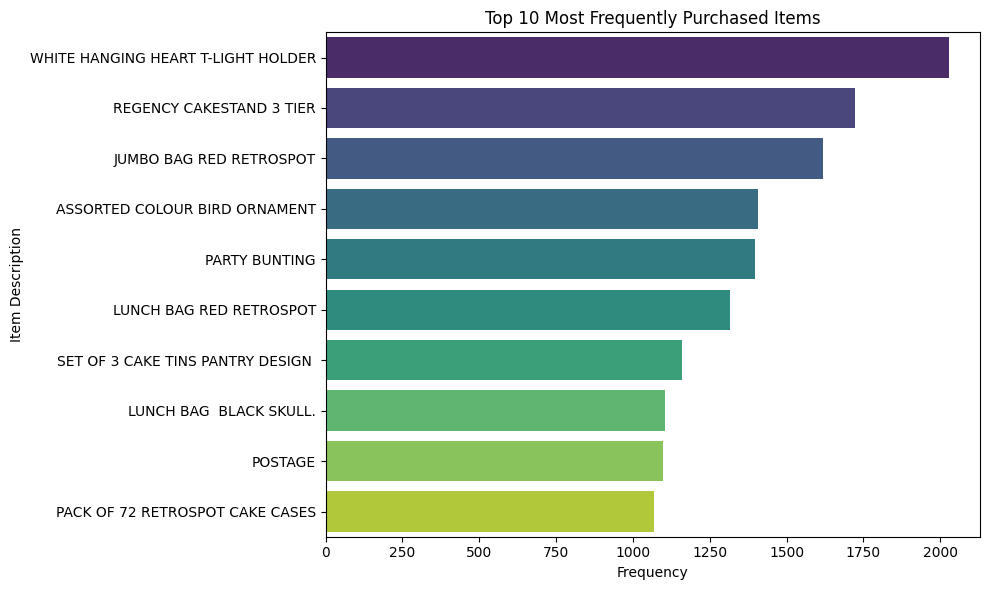

In [ ]:
#visualization of most frequent item.
top_items = df_clean['Description'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_items.index, x=top_items.values, palette="viridis")
plt.title("Top 10 Most Frequently Purchased Items")
plt.xlabel("Frequency")
plt.ylabel("Item Description")
plt.tight_layout()
plt.show()


/tmp/ipython-input-9-2527159433.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)


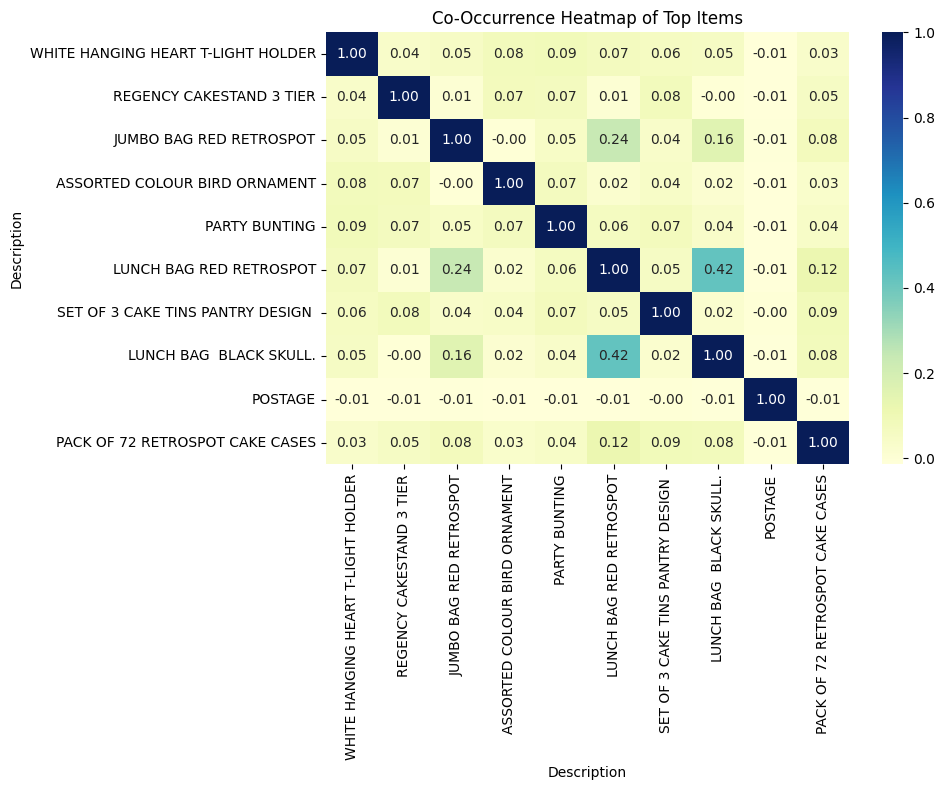

In [ ]:
# Sample only UK transactions to reduce processing time
basket = (df_clean[df_clean['Country'] == 'United Kingdom']
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))

# Convert quantities to 1/0 (presence/absence)
basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)

# Compute item-item correlation matrix (top items only for clarity)
corr_items = basket_encoded.corr()
top_corr_items = corr_items.loc[top_items.index, top_items.index]

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(top_corr_items, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Co-Occurrence Heatmap of Top Items")
plt.tight_layout()
plt.show()


Step 2: Frequent Itemset Mining Using Apriori

In [4]:
# Step 1: Load & Clean the Dataset
import pandas as pd
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Online Retail.xlsx')
df_clean = df.dropna(subset=['Description', 'CustomerID'])
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

# Step 2: Filter for UK transactions and build basket
df_uk = df_clean[df_clean['Country'] == 'United Kingdom']
basket = df_uk.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)

# Step 3: Encode as boolean for Apriori
basket_encoded = basket > 0
basket_encoded = basket_encoded.astype(bool)

# Step 4: Apply Apriori
frequent_itemsets_apriori = apriori(basket_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets_apriori = frequent_itemsets_apriori.sort_values(by='support', ascending=False)

# Step 5: Show results
print(frequent_itemsets_apriori.head(10))


      support                              itemsets
582  0.113180  (WHITE HANGING HEART T-LIGHT HOLDER)
250  0.086928             (JUMBO BAG RED RETROSPOT)
413  0.084705            (REGENCY CAKESTAND 3 TIER)
38   0.078097       (ASSORTED COLOUR BIRD ORNAMENT)
340  0.077496                       (PARTY BUNTING)
285  0.067283             (LUNCH BAG RED RETROSPOT)
466  0.060495   (SET OF 3 CAKE TINS PANTRY DESIGN )
277  0.059834             (LUNCH BAG  BLACK SKULL.)
334  0.056770     (PAPER CHAIN KIT 50'S CHRISTMAS )
308  0.056350     (NATURAL SLATE HEART CHALKBOARD )


/tmp/ipython-input-5-2393037368.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=frequent_itemsets_apriori.head(10), y='itemset_str', x='support', palette='mako')


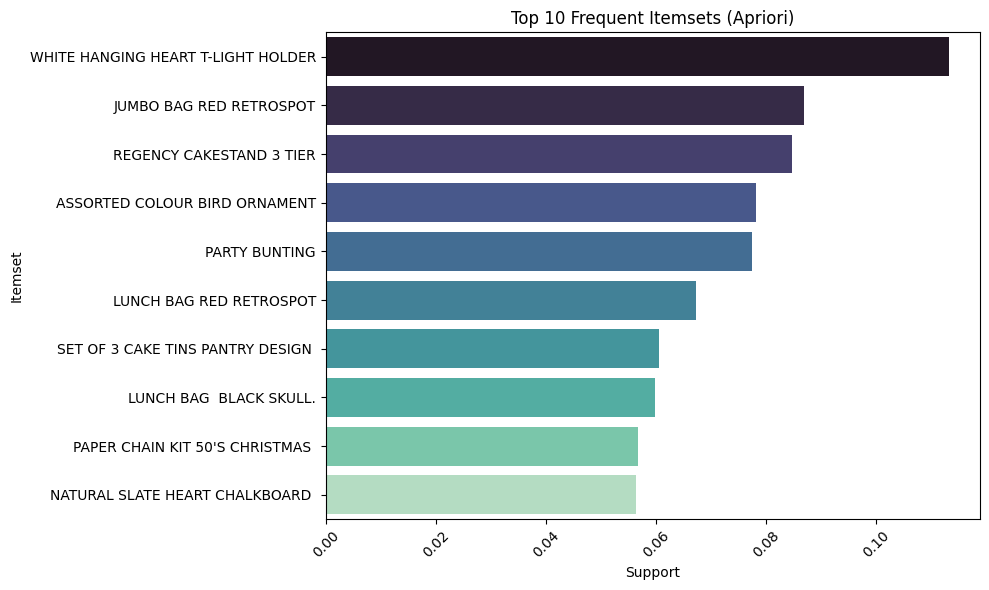

In [5]:
# Add a string version of the itemsets for easy plotting
frequent_itemsets_apriori['itemset_str'] = frequent_itemsets_apriori['itemsets'].apply(lambda x: ', '.join(list(x)))

# Plot the top 10 frequent itemsets using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=frequent_itemsets_apriori.head(10), y='itemset_str', x='support', palette='mako')
plt.title('Top 10 Frequent Itemsets (Apriori)')
plt.xlabel('Support')
plt.ylabel('Itemset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Step 3: Frequent Itemset Mining Using FP-Growth

In [6]:
# Import the FP-Growth algorithm
from mlxtend.frequent_patterns import fpgrowth

# Apply the same support threshold (e.g., 0.01 = 1%)
frequent_itemsets_fpgrowth = fpgrowth(basket_encoded, min_support=0.01, use_colnames=True)

# Sort itemsets by support
frequent_itemsets_fpgrowth = frequent_itemsets_fpgrowth.sort_values(by='support', ascending=False)

# Display top frequent itemsets
print("Top 10 Frequent Itemsets from FP-Growth:\n")
print(frequent_itemsets_fpgrowth.head(10))

Top 10 Frequent Itemsets from FP-Growth:

      support                              itemsets
0    0.113180  (WHITE HANGING HEART T-LIGHT HOLDER)
77   0.086928             (JUMBO BAG RED RETROSPOT)
244  0.084705            (REGENCY CAKESTAND 3 TIER)
7    0.078097       (ASSORTED COLOUR BIRD ORNAMENT)
438  0.077496                       (PARTY BUNTING)
27   0.067283             (LUNCH BAG RED RETROSPOT)
466  0.060495   (SET OF 3 CAKE TINS PANTRY DESIGN )
141  0.059834             (LUNCH BAG  BLACK SKULL.)
18   0.056770     (PAPER CHAIN KIT 50'S CHRISTMAS )
64   0.056350     (NATURAL SLATE HEART CHALKBOARD )


/tmp/ipython-input-7-2595208411.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=frequent_itemsets_fpgrowth.head(10), y='itemset_str', x='support', palette='rocket')


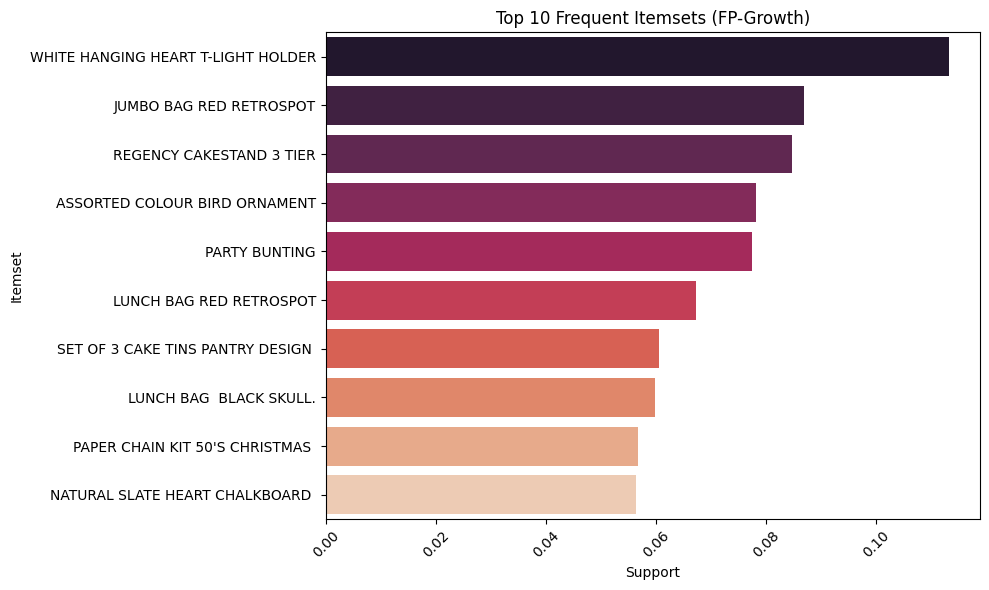

In [7]:
# Add a string version of the itemsets for plotting
frequent_itemsets_fpgrowth['itemset_str'] = frequent_itemsets_fpgrowth['itemsets'].apply(lambda x: ', '.join(list(x)))

# Plot the top 10 frequent itemsets using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=frequent_itemsets_fpgrowth.head(10), y='itemset_str', x='support', palette='rocket')
plt.title('Top 10 Frequent Itemsets (FP-Growth)')
plt.xlabel('Support')
plt.ylabel('Itemset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Step 4: Generating and Analyzing Association Rules

In [8]:
from mlxtend.frequent_patterns import association_rules

# -------------------------------
# Rules from Apriori
# -------------------------------
print("Generating rules from Apriori frequent itemsets...")

# Use a confidence threshold of 0.4 (you can adjust as needed)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.4)

# Show rule summary
print(f"Total Apriori Rules Generated: {len(rules_apriori)}")
if not rules_apriori.empty:
    print(rules_apriori[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())
else:
    print("No rules found for Apriori. Try lowering min_threshold or support.")

Generating rules from Apriori frequent itemsets...
Total Apriori Rules Generated: 446
                          antecedents                         consequents  \
0           (JUMBO BAG PINK POLKADOT)           (JUMBO BAG RED RETROSPOT)   
1           (LUNCH BAG RED RETROSPOT)           (LUNCH BAG  BLACK SKULL.)   
2           (LUNCH BAG  BLACK SKULL.)           (LUNCH BAG RED RETROSPOT)   
3   (GREEN REGENCY TEACUP AND SAUCER)  (ROSES REGENCY TEACUP AND SAUCER )   
4  (ROSES REGENCY TEACUP AND SAUCER )   (GREEN REGENCY TEACUP AND SAUCER)   

    support  confidence       lift  
0  0.030398    0.623153   7.168625  
1  0.029076    0.432143   7.222339  
2  0.029076    0.485944   7.222339  
3  0.028595    0.777778  19.095706  
4  0.028595    0.702065  19.095706  


In [9]:
# -------------------------------
# Rules from FP-Growth
# -------------------------------
print("\nGenerating rules from FP-Growth frequent itemsets...")

rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="confidence", min_threshold=0.4)

print(f"Total FP-Growth Rules Generated: {len(rules_fpgrowth)}")
if not rules_fpgrowth.empty:
    print(rules_fpgrowth[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())
else:
    print("No rules found for FP-Growth. Try lowering min_threshold or support.")



Generating rules from FP-Growth frequent itemsets...
Total FP-Growth Rules Generated: 446
                          antecedents                         consequents  \
0           (JUMBO BAG PINK POLKADOT)           (JUMBO BAG RED RETROSPOT)   
1           (LUNCH BAG RED RETROSPOT)           (LUNCH BAG  BLACK SKULL.)   
2           (LUNCH BAG  BLACK SKULL.)           (LUNCH BAG RED RETROSPOT)   
3   (GREEN REGENCY TEACUP AND SAUCER)  (ROSES REGENCY TEACUP AND SAUCER )   
4  (ROSES REGENCY TEACUP AND SAUCER )   (GREEN REGENCY TEACUP AND SAUCER)   

    support  confidence       lift  
0  0.030398    0.623153   7.168625  
1  0.029076    0.432143   7.222339  
2  0.029076    0.485944   7.222339  
3  0.028595    0.777778  19.095706  
4  0.028595    0.702065  19.095706  


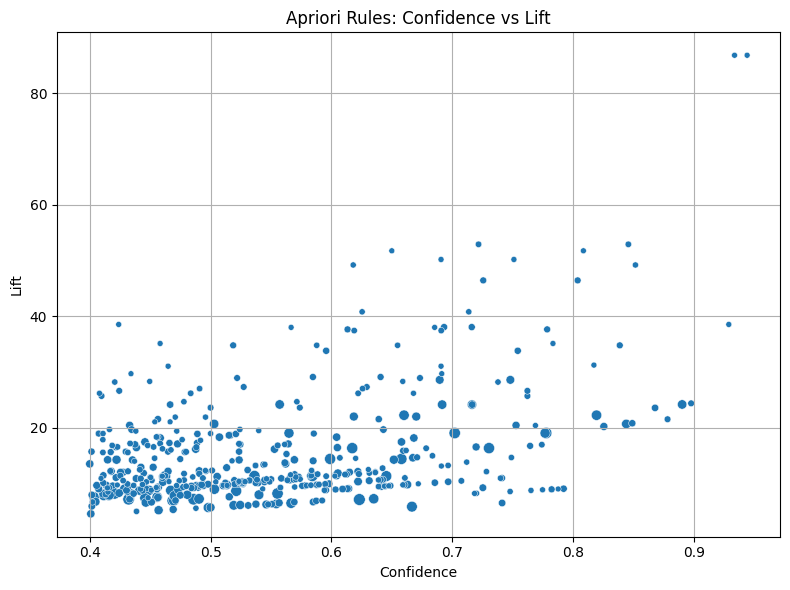

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to avoid plotting empty frames
if not rules_apriori.empty:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=rules_apriori, x='confidence', y='lift', size='support', legend=False)
    plt.title('Apriori Rules: Confidence vs Lift')
    plt.xlabel('Confidence')
    plt.ylabel('Lift')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

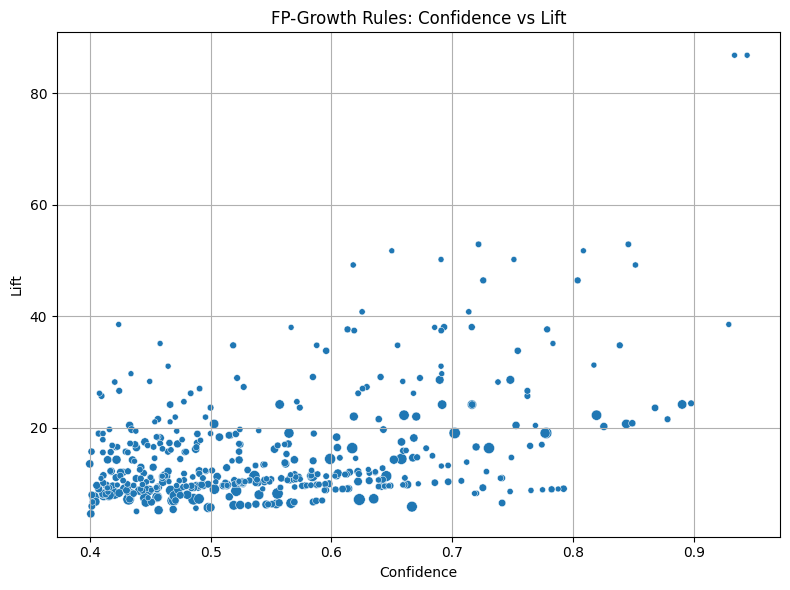

In [11]:
if not rules_fpgrowth.empty:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=rules_fpgrowth, x='confidence', y='lift', size='support', legend=False)
    plt.title('FP-Growth Rules: Confidence vs Lift')
    plt.xlabel('Confidence')
    plt.ylabel('Lift')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## **Step 5: Comparative Analysis: Apriori vs. FP-Growth**

### **Efficiency Comparison**

The Apriori and FP-Growth algorithms were compared in terms of performance and output using the *Online Retail* dataset. Apriori was found to be computationally slower due to its candidate generation process and multiple database scans. In contrast, FP-Growth demonstrated superior efficiency by constructing an FP-tree and avoiding repetitive scans. This resulted in faster execution times, especially when processing large volumes of transactional data.

### **Output Comparison**

Despite differences in algorithmic design, both Apriori and FP-Growth produced largely similar frequent itemsets and association rules. The top frequent itemsets identified by both algorithms were consistent when using the same minimum support threshold (1%). Furthermore, the generated association rules exhibited similar values for confidence and lift, with only minor variations in ordering.

| **Metric**               | **Apriori**                       | **FP-Growth**                    |
|--------------------------|-----------------------------------|----------------------------------|
| Frequent Itemsets        | Similar to FP-Growth              | Similar to Apriori               |
| Execution Speed          | Slower due to multiple scans      | Faster due to FP-tree structure  |
| Rule Generation Output   | Comparable with high-lift rules   | Comparable with high-lift rules  |

### **Challenges and Resolutions**

Several challenges emerged during the lab:

1. **Data Loading Performance**  
   Initially, the dataset took significant time to load due to its size and Excel format. This was mitigated by previewing a limited number of rows before loading the full dataset.

2. **Deprecation Warnings**  
   A deprecation warning was raised when using `DataFrame.applymap()`. This was resolved by replacing it with a boolean mask (`basket > 0`) and casting it with `.astype(bool)`, which improved performance and complied with best practices.

3. **Sparse Rule Generation**  
   In some cases, especially with high confidence thresholds, both algorithms returned a limited number of rules. Lowering the `min_threshold` to 0.4 helped in uncovering more meaningful patterns.

### **Conclusion**

FP-Growth demonstrated greater computational efficiency and scalability compared to Apriori, making it more suitable for large-scale datasets. However, Apriori remains a valuable algorithm for understanding the fundamentals of association rule mining. Both approaches were effective in uncovering insightful patterns from the transactional dataset and provided valuable business intelligence for potential cross-selling and product bundling strategies.